In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as snb
import numpy as np

In [2]:
#Importing Dataset
credit_card_data = pd.read_csv("creditcard.csv")
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
#Checking the total no.of fraud and non-fraud transactions
print(credit_card_data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [4]:
#Handling Categorical Data
credit_card_data['Class'] = credit_card_data['Class'].astype('category')
credit_card_data['Class'] = credit_card_data['Class'].cat.rename_categories({1:"Fraud",0:"No Fraud"})
credit_card_data['Class'].value_counts()

Class
No Fraud    284315
Fraud          492
Name: count, dtype: int64

In [5]:
#Handling missing values
imputer = SimpleImputer(strategy='mean')
credit_card_data['Amount'] = imputer.fit_transform(credit_card_data[['Amount']])

In [6]:
#Feature Selection
features = credit_card_data.drop('Class',axis=1)
target = credit_card_data['Class']

#Splitting of train data and test data
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)

warnings.filterwarnings('ignore')

#Training the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [7]:
#Data Prediction
Y_pred = model.predict(X_test)

#Evaluation of model
accuracy = accuracy_score(Y_pred,Y_test)
print(f"Accuracy : {accuracy*100} ")

Accuracy : 99.92626663389628 


In [8]:
#Visualizing the model evaluatuion using confusion matrix
cm_matrix = confusion_matrix(Y_test,Y_pred)
print(cm_matrix)

[[   64    34]
 [    8 56856]]


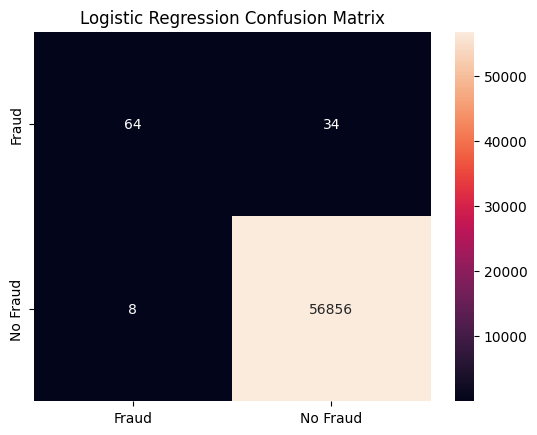

In [9]:
snb.heatmap(cm_matrix,annot=True,fmt='d',xticklabels=['Fraud','No Fraud'],yticklabels=['Fraud','No Fraud'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [10]:
#Classifictaion Report
print('Classification Report : ',classification_report(Y_test,Y_pred))

Classification Report :                precision    recall  f1-score   support

       Fraud       0.89      0.65      0.75        98
    No Fraud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



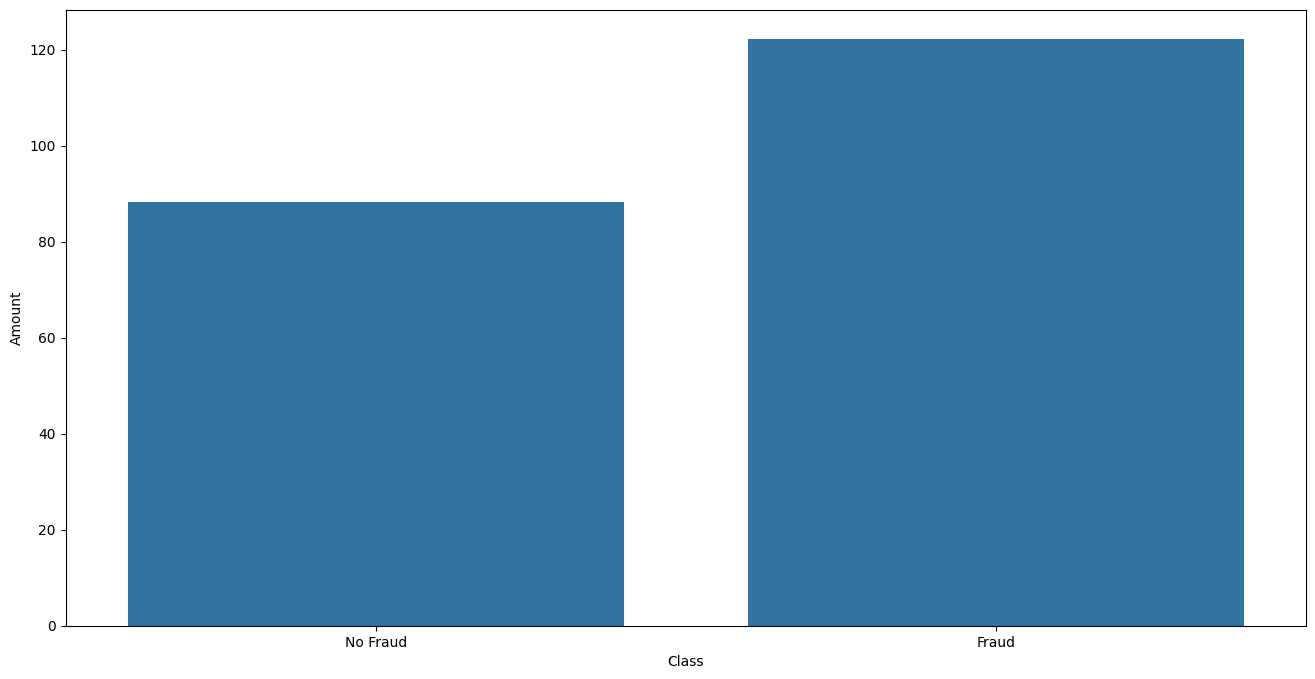

In [11]:
#Comparision of amount of fraud and non-fraud transactions
credit_card_data.replace([np.inf, -np.inf], np.nan, inplace=True)
plt.figure(figsize=(16,8))
snb.barplot(x='Class',y='Amount',data=credit_card_data,ci=0)
plt.show()

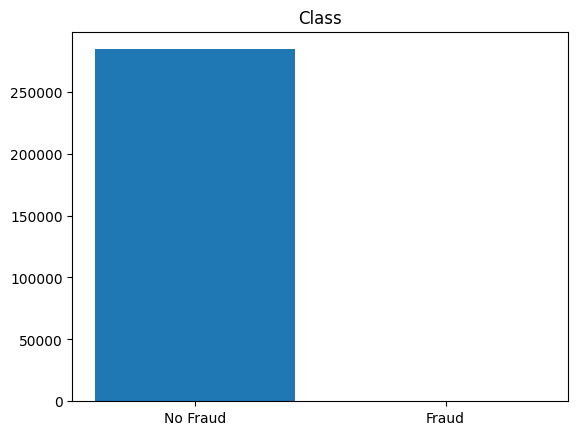

In [12]:
category = credit_card_data['Class'].unique()
counts = credit_card_data['Class'].value_counts()

#Comparison of Total transactions of both class
plt.bar(category,counts)
plt.title('Class')
plt.show()